<center><h2>Top 40 Donut Shops in San Francisco</h2><center>

#### Objective : Scraping the top 40 doughnut shops' details from Yelp.com, locating their geolocation using positionstack.com api,

####                    and saving the result in MongoDB

#### Importing Libraries

In [8]:
import requests
import re
import json
import pandas as pd
from datetime import datetime
from requests import Session
from bs4 import BeautifulSoup as bs
import random
import time
import os
from scrapy import Selector

### header
header = {'User-Agent':'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/44.0.2403.157 Safari/537.36',
                           'Accept-Language': 'en-US, en;q=0.5',"Authorization": "Bearer #BearerToken"}

#### Saving Top 40 Donut shops in San Francisco

#### Step 1: Searh for “Donut Shop” in the San Francisco area in Yelp using GET requests
#### Step 2: Save each search result page to disk, “sf_donut_shop_search_page_[PN].htm” ([PN] is pagenumber)

In [2]:
### Try catch to check the connection
try:
    ### looping to capture 4 pages
    for i in range(1,5):
        
        if(i!=1):
            x = (i-1)*10
        else:
            x = i-1
        ### URL to capture donut shops
        url= "https://www.yelp.com/search?find_desc=donut+shop&find_loc=San+Francisco%2C+CA&ns=20&start=" + str(x)
        
        ### Capturing the pages 
        page = requests.get(url,headers=header)
        
        ### Creating dynamic file name
        filename = "sf_donut_shop_search_page_"+str(i)+".htm"
        
        ### Loading the content into local file
        with open(filename, 'wb') as fd:
            fd.write(page.content)   
            
        ### Sleep command to wait for some time before scraping next page
        time.sleep(random.randrange(10,25))
except:
        print("Problem with the connection.....")  

#### Step 3: Capture all the details of the top 40 donut shops

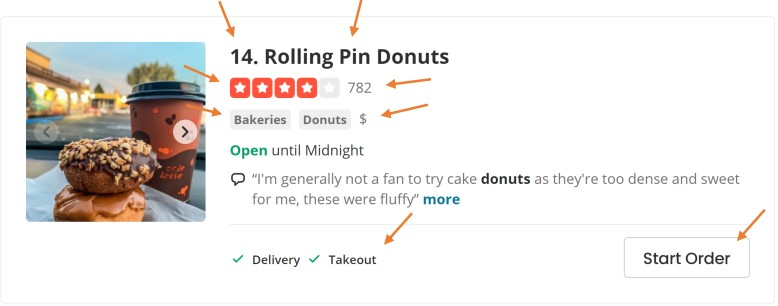

In [6]:
### Initiating the fields needed
Rank = []
Name = []
Link = []
Rating = []
Reviews = []
Keywords = []
Price_Range = []
Del_Dineout = []
Order_through_Yelp = []

print("Top 40 Donut Shop Details : \n")
for x in range(1,5):
    ### Opening the html files
    with open("sf_donut_shop_search_page_" + str(x) + ".htm", encoding="utf8") as file:
        contents = file.read()

    ### Creating a BeautifulSoup object and specifying the parser
    soup = bs(contents, 'lxml')

    ### Get the items list by using common class
    list_of_items = soup.findAll("li",{"class":"border-color--default__09f24__NPAKY"})

    ### Iterating trough each item on page to display product name, link and bids
    for i in list_of_items:  

        ### Accessing the name with tage h3 and class "css-uvzfg9"
        name = i.find_all('h3',{"class":"css-uvzfg9"})
        var = str([0,1,2,3,4,5,6,7,8,9])
        if(len(name)>0 and name[0].text[0] in var):
            sel = Selector(text=str(i), type="html")
            ### Capturing Rank
            print("Rank : ",name[0].text.split(".", 1)[0])
            Rank.append(name[0].text.split(".", 1)[0])

            ### Capturing Name
            print("Name : ",name[0].text.split(".", 1)[1].strip())
            Name.append(name[0].text.split(".", 1)[1].strip())

            ### Accessing the first link for each shop
            for link in i.find_all('a',limit=1):
                print("Link : ","https://www.yelp.com" + link.get('href'))
                Link.append("https://www.yelp.com" + link.get('href'))


            ### Capturing Review Count
            print("Reviews : ",i.find_all('span',{"class":"reviewCount__09f24__tnBk4 css-1e4fdj9"})[0].text)
            Reviews.append(i.find_all('span',{"class":"reviewCount__09f24__tnBk4 css-1e4fdj9"})[0].text)
            
            ### Capturing Ratings
            print("Ratings : ",sel.xpath('//div[re:test(@class, "^i-stars")]/@aria-label').get().replace(" star rating",""))
            Rating.append(sel.xpath('//div[re:test(@class, "^i-stars")]/@aria-label').get().replace(" star rating",""))

            ### Capturing KeyWords
            keywords = ""
            for word in i.find_all('button'):
                if(keywords==""):
                    keywords = word.text
                else:
                    keywords = keywords + "," + word.text
            print("Tags :",keywords)
            Keywords.append(keywords)

            ### Selecting Price Range
            print("Price Range :",sel.xpath('//span[re:test(@class, "^priceRange")]//text()').get())
            Price_Range.append(sel.xpath('//span[re:test(@class, "^priceRange")]//text()').get())  
            
            ### Captuing Dining Tags and their flags
            options = sel.xpath('//div[re:test(@class, "^margin-t1-5")]//p[re:test(@class, "^tagText")]//text()').getall()
            values = sel.xpath('//path[re:test(@d,"^M9.06") or re:test(@d,"^M6")]//@d').getall()
            dine = []
            if(len(options)>0):
                for v in range(0,len(options)):
                    if(str(values[v])[1]=="9"):
                        dine.append(options[v] + " : " + "No")
                    else:
                        dine.append(options[v] + " : " + "Yes")  
            dine = str(dine).replace("[","").replace("]","").replace("'","")
            print("Dining Keywords :",dine)
            Del_Dineout.append(dine)  
            
            ### Falging whether yelp facilitates ordering ot not
            if(re.search("Start Order",str(i.text))==None):
                Order_through_Yelp.append("NO")
                print("Order Through Yelp : NO")
            else:
                Order_through_Yelp.append("YES")
                print("Order Through Yelp : YES")

Top 40 Donut Shop Details : 

Rank :  1
Name :  Bob’s Donuts & Pastry Shop
Link :  https://www.yelp.com/biz/bobs-donuts-and-pastry-shop-san-francisco?osq=donut+shop
Reviews :  3327
Ratings :  4.5
Tags : Bakeries,Donuts
Price Range : $
Dining Keywords : 
Order Through Yelp : NO
Rank :  2
Name :  Uncle Benny’s Donut and Bagel
Link :  https://www.yelp.com/biz/uncle-bennys-donut-and-bagel-san-francisco?osq=donut+shop
Reviews :  388
Ratings :  4.5
Tags : Donuts,Bagels,Coffee & Tea
Price Range : $$
Dining Keywords : Outdoor dining : No, Delivery : Yes, Takeout : Yes
Order Through Yelp : YES
Rank :  3
Name :  Twisted Donuts and Coffee
Link :  https://www.yelp.com/biz/twisted-donuts-and-coffee-san-francisco?osq=donut+shop
Reviews :  508
Ratings :  4.5
Tags : Donuts,Bakeries
Price Range : $
Dining Keywords : Delivery : No, Takeout : Yes
Order Through Yelp : NO
Rank :  4
Name :  All Star Donuts
Link :  https://www.yelp.com/biz/all-star-donuts-san-francisco-3?osq=donut+shop
Reviews :  280
Ratings

In [7]:
### Creating a dataset with all the captures field lists
data =  pd.DataFrame({'Rank':Rank,'Name':Name,'Link':Link,"Ratings":Rating,"Reviews":Reviews,"Keywords":Keywords,
                      "Price Range":Price_Range,"Dining Tags":Del_Dineout,"Can_Order?":Order_through_Yelp})
data

,Rank,Name,Link,Ratings,Reviews,Keywords,Price Range,Dining Tags,Can_Order?
0,1,Bob’s Donuts & Pastry Shop,https://www.yelp.com/biz/bobs-donuts-and-pastr...,4.5,3327,"Bakeries,Donuts",$,,NO
1,2,Uncle Benny’s Donut and Bagel,https://www.yelp.com/biz/uncle-bennys-donut-an...,4.5,388,"Donuts,Bagels,Coffee & Tea",$$,"Outdoor dining : No, Delivery : Yes, Takeout :...",YES
2,3,Twisted Donuts and Coffee,https://www.yelp.com/biz/twisted-donuts-and-co...,4.5,508,"Donuts,Bakeries",$,"Delivery : No, Takeout : Yes",NO
3,4,All Star Donuts,https://www.yelp.com/biz/all-star-donuts-san-f...,4,280,"Donuts,Sandwiches,Coffee & Tea",$,"Delivery : Yes, Takeout : Yes",YES
4,5,Bob’s Donuts,https://www.yelp.com/biz/bobs-donuts-san-franc...,4.5,116,"Donuts,Bakeries",$,Takeout : Yes,NO
5,6,Happy Donuts,https://www.yelp.com/biz/happy-donuts-san-fran...,4,269,"Donuts,Coffee & Tea",$,,NO
6,7,Donut World,https://www.yelp.com/biz/donut-world-san-franc...,4,275,"Coffee & Tea,Donuts",$,Takeout : Yes,NO
7,8,Dynamo Donut & Coffee,https://www.yelp.com/biz/dynamo-donut-and-coff...,4,1946,"Coffee & Tea,Donuts,Patisserie/Cake Shop",$,"Delivery : Yes, Takeout : Yes, Curbside Pickup...",NO
8,9,Mochill Mochi Donut,https://www.yelp.com/biz/mochill-mochi-donut-s...,4.5,819,Donuts,None,Takeout : Yes,NO
9,10,Golden Donuts,https://www.yelp.com/biz/golden-donuts-san-fra...,4,124,"Donuts,Coffee & Tea,Sandwiches",$,Outdoor dining : Yes,NO


#### Step 4 : Saving the data to MongoDB

In [128]:
### Opening MongoDB Client and Conecting to database
from pymongo import MongoClient
import json
import pandas as pd
client = MongoClient('mongodb://localhost:27017/?readPreference=primary&appname=MongoDB%20Compass&directConnection=true&ssl=false')

### Creating yelp database
yelp = client["yelp"]

### Creating sf_donut_shops collection
donutshop = yelp["sf_donut_shops"]

### Loading the data collected
donutshop.insert_many(data.to_dict('records'))

In [98]:
print(client.list_database_names())

['admin', 'config', 'crunchbase', 'enron_messages', 'local', 'mongomart_cart', 'mongomart_item', 'samples_friends', 'samples_pokemon', 'video_movieDetails', 'video_movies', 'video_reviews', 'yelp']


In [129]:
### Connecting Back to yelp 
db = client["yelp"]

### Loading the sf_donut_shops collection
ds = db["sf_donut_shops"]

### Saving it in dataframe
donutshops = pd.DataFrame(pd.json_normalize(ds.find()))

donutshops

,_id,Rank,Name,Link,Ratings,Reviews,Keywords,Price Range,Dining Tags,Can_Order?
0,622032eeb6249bdcdd34e353,1,Bob’s Donuts & Pastry Shop,https://www.yelp.com/biz/bobs-donuts-and-pastr...,4.5,3327,"Bakeries,Donuts",$,,NO
1,622032eeb6249bdcdd34e354,2,Uncle Benny’s Donut and Bagel,https://www.yelp.com/biz/uncle-bennys-donut-an...,4.5,388,"Donuts,Bagels,Coffee & Tea",$$,"Outdoor dining, Delivery, Takeout",YES
2,622032eeb6249bdcdd34e355,3,Twisted Donuts and Coffee,https://www.yelp.com/biz/twisted-donuts-and-co...,4.5,508,"Donuts,Bakeries",$,"Delivery, Takeout",NO
3,622032eeb6249bdcdd34e356,4,All Star Donuts,https://www.yelp.com/biz/all-star-donuts-san-f...,4,280,"Donuts,Sandwiches,Coffee & Tea",$,"Delivery, Takeout",YES
4,622032eeb6249bdcdd34e357,5,Bob’s Donuts,https://www.yelp.com/biz/bobs-donuts-san-franc...,4.5,116,"Donuts,Bakeries",$,Takeout,NO
5,622032eeb6249bdcdd34e358,6,Happy Donuts,https://www.yelp.com/biz/happy-donuts-san-fran...,4,269,"Donuts,Coffee & Tea",$,,NO
6,622032eeb6249bdcdd34e359,7,Donut World,https://www.yelp.com/biz/donut-world-san-franc...,4,275,"Coffee & Tea,Donuts",$,Takeout,NO
7,622032eeb6249bdcdd34e35a,8,Dynamo Donut & Coffee,https://www.yelp.com/biz/dynamo-donut-and-coff...,4,1946,"Coffee & Tea,Donuts,Patisserie/Cake Shop",$,"Delivery, Takeout, Curbside Pickup",NO
8,622032eeb6249bdcdd34e35b,9,Mochill Mochi Donut,https://www.yelp.com/biz/mochill-mochi-donut-s...,4.5,819,Donuts,None,Takeout,NO
9,622032eeb6249bdcdd34e35c,10,Golden Donuts,https://www.yelp.com/biz/golden-donuts-san-fra...,4,124,"Donuts,Coffee & Tea,Sandwiches",$,Outdoor dining,NO


#### Step 5: Visiting all the 40 donot shop webpages to capture address, phone number and Website Link

In [5]:
### Try catch to check the connection
try:
    ### looping to capture 40 pages
    for i in range(0,len(donutshops)):
        
        ### Capturing the pages 
        page = requests.get(donutshops['Link'][i],headers=header)
        
        ### Creating dynamic file name
        filename = "sf_donut_shop_"+str(i)+".htm"
        
        ### Loading the content into local file
        with open(filename, 'wb') as fd:
            fd.write(page.content)   
            
        ### Sleep command to wait for some time before scraping next page
        time.sleep(random.randrange(3,5))
except:
        print("Problem with the connection.....") 

In [149]:
### Saving Address, phone and website 
P = ""
A = ""
Website = []

print("\nAddress, Phone , Geo location and Website links :\n")

### Iterating 40 times to read all the 40 pages to display Address, Phone , Geo location and Website links
for j in range(0,len(donutshops)):
    
    print("Rank :", Rank[j])
    print("Shop Name :", Name[j])
    
    ### Opening the html files
    with open("sf_donut_shop_" + str(j) + ".htm", encoding="utf8") as file:
        contents = file.read()

    ### Creating a BeautifulSoup object and specifying the parser
    soup = bs(contents, 'lxml')

    ### Get the items list by using common class

    ##list_of_items = soup.findAll("a",{"role":"link"})
    list_of_items = soup.findAll("section",{"class":"margin-b3__09f24__l9v5d border-color--default__09f24__NPAKY"})

    ### Iterating trough each item on page to display product name, link and bids
    var = str([0,1,2,3,4,5,6,7,8,9])
    for i in list_of_items:
        for a in i.findAll("p",{"data-font-weight":"semibold"}):
            if(a.text[0]=="("):
                ph = a.text
                print("Phone :",ph)
            if(a.text[0] in var):
                ad = a.text
                print("Address :",ad)
                api = requests.request("GET","http://api.positionstack.com/v1/forward?access_key=85ce236b46dc611d43989e5ca11fa932&query="+str(ad), headers=header)
                loc = json.loads(api.text)
                loc1 = loc["data"][0]
                print("Geo Location : (" + str(loc1["latitude"]) + "," + str(loc1["longitude"]) + ")")

        ### Accessing the first link for each shop
        if(len(i.text)>5):
            x = i.text.startswith('Business website')
            if(x==True):
                for link in i.find_all('a',attrs={'href': re.compile("^/biz_redir")},limit=1):
                    Website.append("https://www.yelp.com" + link.get('href'))
                    print("Website Link :","https://www.yelp.com" + link.get('href'))
            else:
                Website.append("Weblink Not Available")
                print("Website Link : Not Available")
                
    
    if P == "":
        P = ph
    else:
        P = P + "," + ph
        
    if A == "":
        A = ad
    else:
        A = A + ":" + ad

Phone = P.split(",")
Address = A.split(":")            

#### Step 6: Using Address to find Geo loaction from positionstack.com API

In [150]:
### Capturing the geo loactions with the address captured above
geo = []
for i in range(0,len(Address)):
    api = requests.request("GET","http://api.positionstack.com/v1/forward?access_key=APIKEY&query="+str(Address[i]), headers=header)
    loc = json.loads(api.text)
    loc1 = loc["data"][0]
    geo.append("(" + str(loc1["latitude"]) + "," + str(loc1["longitude"]) + ")")
    

In [151]:
### Saving all informations in dataframe
data1 =  pd.DataFrame({'Address':Address,'Phone':Phone,"Website":Website,'Geolocation':geo})
data1

,Address,Phone,Website,Geolocation
0,"1621 Polk St San Francisco, CA 94109",(415) 776-3141,https://www.yelp.com/biz_redir?url=http%3A%2F%...,"(37.791852,-122.421276)"
1,"2049 Irving St San Francisco, CA 94122",(628) 219-0956,Weblink Not Available,"(37.763299,-122.480192)"
2,"1243 Noriega St San Francisco, CA 94122",(415) 463-5437,https://www.yelp.com/biz_redir?url=http%3A%2F%...,"(37.754095,-122.477233)"
3,"901 Clement St San Francisco, CA 94118",(415) 221-9838,Weblink Not Available,"(37.782559,-122.468983)"
4,"601 Baker St San Francisco, CA 94117",(415) 776-3141,https://www.yelp.com/biz_redir?url=https%3A%2F...,"(37.776539,-122.441854)"
5,"3801 24th St San Francisco, CA 94114",(415) 285-5890,Weblink Not Available,"(37.751594,-122.427598)"
6,"1399 9th Ave San Francisco, CA 94122",(415) 665-4240,Weblink Not Available,"(37.762306,-122.466344)"
7,"2760 24th St San Francisco, CA 94110",(415) 920-1978,https://www.yelp.com/biz_redir?url=http%3A%2F%...,"(37.753022,-122.407644)"
8,"1737 Post St Ste 395 San Francisco, CA 94115",(650) 619-2462,https://www.yelp.com/biz_redir?url=https%3A%2F...,"(37.778008,-122.431272)"
9,"5401 Geary Blvd San Francisco, CA 94121",(415) 422-0623,Weblink Not Available,"(37.780247,-122.477407)"


#### Step 7: Updating the database with latest geo location information

In [152]:
### Updating the information in the database
for i in range(1,len(data1)+1):
    query = {"Rank":str(i)}
    newvalues = { "$set": data1.to_dict(orient='records')[i-1] }
    ds.update_one(query,newvalues)

#### Step 8: Indexing and Displaying all the information of donutshops

In [153]:
### Indexing
ds.create_index('Rank', name="Rank_index")
ds.index_information()

### Retreving the entire infromation from database collection
donutshops = pd.DataFrame(pd.json_normalize(ds.find()))
donutshops

,_id,Rank,Name,Link,Ratings,Reviews,Keywords,Price Range,Dining Tags,Can_Order?,Address,Geolocation,Phone,Website
0,622032eeb6249bdcdd34e353,1,Bob’s Donuts & Pastry Shop,https://www.yelp.com/biz/bobs-donuts-and-pastr...,4.5,3327,"Bakeries,Donuts",$,,NO,"1621 Polk St San Francisco, CA 94109","(37.791852,-122.421276)",(415) 776-3141,https://www.yelp.com/biz_redir?url=http%3A%2F%...
1,622032eeb6249bdcdd34e354,2,Uncle Benny’s Donut and Bagel,https://www.yelp.com/biz/uncle-bennys-donut-an...,4.5,388,"Donuts,Bagels,Coffee & Tea",$$,"Outdoor dining, Delivery, Takeout",YES,"2049 Irving St San Francisco, CA 94122","(37.763299,-122.480192)",(628) 219-0956,Weblink Not Available
2,622032eeb6249bdcdd34e355,3,Twisted Donuts and Coffee,https://www.yelp.com/biz/twisted-donuts-and-co...,4.5,508,"Donuts,Bakeries",$,"Delivery, Takeout",NO,"1243 Noriega St San Francisco, CA 94122","(37.754095,-122.477233)",(415) 463-5437,https://www.yelp.com/biz_redir?url=http%3A%2F%...
3,622032eeb6249bdcdd34e356,4,All Star Donuts,https://www.yelp.com/biz/all-star-donuts-san-f...,4,280,"Donuts,Sandwiches,Coffee & Tea",$,"Delivery, Takeout",YES,"901 Clement St San Francisco, CA 94118","(37.782559,-122.468983)",(415) 221-9838,Weblink Not Available
4,622032eeb6249bdcdd34e357,5,Bob’s Donuts,https://www.yelp.com/biz/bobs-donuts-san-franc...,4.5,116,"Donuts,Bakeries",$,Takeout,NO,"601 Baker St San Francisco, CA 94117","(37.776539,-122.441854)",(415) 776-3141,https://www.yelp.com/biz_redir?url=https%3A%2F...
5,622032eeb6249bdcdd34e358,6,Happy Donuts,https://www.yelp.com/biz/happy-donuts-san-fran...,4,269,"Donuts,Coffee & Tea",$,,NO,"3801 24th St San Francisco, CA 94114","(37.751594,-122.427598)",(415) 285-5890,Weblink Not Available
6,622032eeb6249bdcdd34e359,7,Donut World,https://www.yelp.com/biz/donut-world-san-franc...,4,275,"Coffee & Tea,Donuts",$,Takeout,NO,"1399 9th Ave San Francisco, CA 94122","(37.762306,-122.466344)",(415) 665-4240,Weblink Not Available
7,622032eeb6249bdcdd34e35a,8,Dynamo Donut & Coffee,https://www.yelp.com/biz/dynamo-donut-and-coff...,4,1946,"Coffee & Tea,Donuts,Patisserie/Cake Shop",$,"Delivery, Takeout, Curbside Pickup",NO,"2760 24th St San Francisco, CA 94110","(37.753022,-122.407644)",(415) 920-1978,https://www.yelp.com/biz_redir?url=http%3A%2F%...
8,622032eeb6249bdcdd34e35b,9,Mochill Mochi Donut,https://www.yelp.com/biz/mochill-mochi-donut-s...,4.5,819,Donuts,None,Takeout,NO,"1737 Post St Ste 395 San Francisco, CA 94115","(37.778008,-122.431272)",(650) 619-2462,https://www.yelp.com/biz_redir?url=https%3A%2F...
9,622032eeb6249bdcdd34e35c,10,Golden Donuts,https://www.yelp.com/biz/golden-donuts-san-fra...,4,124,"Donuts,Coffee & Tea,Sandwiches",$,Outdoor dining,NO,"5401 Geary Blvd San Francisco, CA 94121","(37.780247,-122.477407)",(415) 422-0623,Weblink Not Available
